In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as cnt
plt.style.use(style='classic')

In [18]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
%autoreload 2

In [20]:
from Devices.Rigol_MSO5354_TCP import *

In [21]:
dv= Oscilloscope()
dv.init_device('158.129.164.117', 'any')
dv.ask('*IDN?')


'RIGOL TECHNOLOGIES,MSO5354,MS5A235307573,00.01.03.00.03'

In [22]:
dv.write(':RUN')

In [23]:
dv.write(':WAVeform:SOURce CHANnel1')

In [24]:
dv.ask(':WAVeform:MODE?')

'NORM'

In [25]:
dv.write(':WAVeform:MODE NORM')

In [26]:
dv.write(':WAVeform:FORMat ASCii')

In [27]:
dv.ask(':WAVeform:FORMat?')


'ASC'

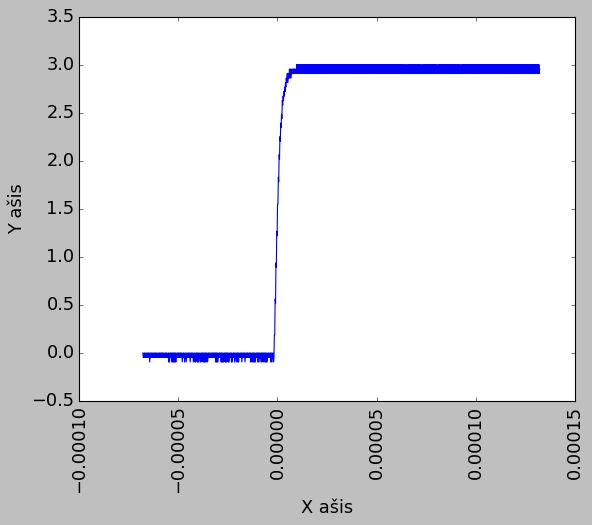

In [28]:
st = dv.ask(':WAV:DATA?')
scale = float(dv.ask(':TIMebase:MAIN:SCALe?'))
offset = float(dv.ask(':TIMebase:MAIN:OFFSet?'))
xr = np.linspace(-500, 500, 1000)*scale/100+offset
fig, ax = plt.subplots()
stl = np.asarray(st[11:].split(',')[:-1])
st_np = stl.astype(float)
ax.plot(xr,st_np)
ax.set_xlabel('X ašis', fontsize=16)
ax.set_ylabel('Y ašis', fontsize=16)
ax.tick_params(axis='x', labelsize=16, rotation=90)
ax.tick_params(axis='y', labelsize=16)
#ax.legend(loc=1)
plt.show()

In [29]:
dv.ask(':TIMebase:MAIN:OFFSet?')


'3.220000E-5'

In [30]:
dv.save_all()